In [93]:
from phimal_utilities.analysis import load_tensorboard

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [171]:
df_deepmod = load_tensorboard('runs/deepmod/')
df_lstsq = load_tensorboard('runs/deepmod_lstsq/')
df_logprob = load_tensorboard('runs/deepmod_logprob/')
df_logprob_lstsq = load_tensorboard('runs/deepmod_logprob_lstsq/')
df_logprob_scaled = load_tensorboard('runs/deepmod_logprob_scaled/')

In [172]:
df_deepmod.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'scaled_coeff_0_0', 'scaled_coeff_0_1',
       'scaled_coeff_0_2', 'scaled_coeff_0_3', 'scaled_coeff_0_4',
       'scaled_coeff_0_5', 'scaled_coeff_0_6', 'scaled_coeff_0_7',
       'scaled_coeff_0_8'],
      dtype='object')

(0.0001, 0.001)

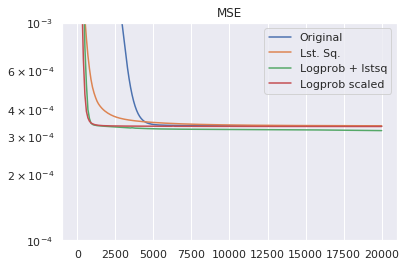

In [201]:
plt.semilogy(df_deepmod.index, df_deepmod['MSE_0'], label='Original')
plt.semilogy(df_lstsq.index, df_lstsq['MSE_0'], label='Lst. Sq.')
#plt.semilogy(df_logprob.index, df_logprob['MSE_0'], label='Logprob')
plt.semilogy(df_logprob_lstsq.index, df_logprob_lstsq['MSE_0'], label='Logprob + lstsq')
plt.semilogy(df_logprob_scaled.index, df_logprob_scaled['MSE_0'], label='Logprob scaled')

plt.legend()
plt.title('MSE')
plt.ylim([1e-4, 1e-3])

Text(0.5, 1.0, 'Log prob')

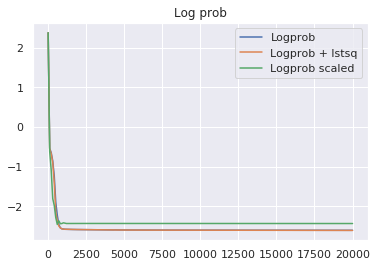

In [175]:
plt.plot(df_logprob.index, df_logprob['L1_0'], label='Logprob')
plt.plot(df_logprob_lstsq.index, df_logprob_lstsq['L1_0'], label='Logprob + lstsq')
plt.plot(df_logprob_scaled.index, df_logprob_scaled['L1_0'], label='Logprob scaled')

plt.legend()
plt.title('Log prob')

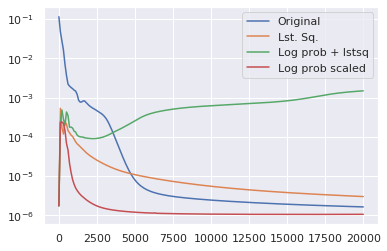

In [202]:
plt.semilogy(df_deepmod.index, df_deepmod['Regression_0'], label='Original')
plt.semilogy(df_lstsq.index, df_lstsq['Regression_0'], label='Lst. Sq.')
#plt.semilogy(df_logprob.index, df_logprob['Regression_0'], label='Log prob')
plt.semilogy(df_logprob_lstsq.index, df_logprob_lstsq['Regression_0'], label='Log prob + lstsq')
plt.semilogy(df_logprob_scaled.index, df_logprob_scaled['Regression_0'], label='Log prob scaled')

plt.legend()

In [179]:
coeff_keys = [key for key in df_deepmod.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_deepmod.keys() if key[:6]=='scaled']

Text(0.5, 1.0, 'Coefficients')

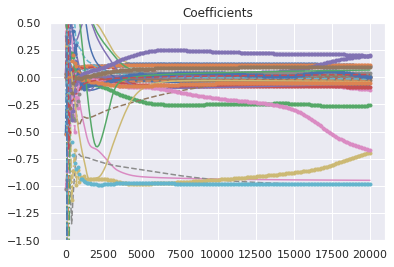

In [203]:
for key in coeff_keys:
    plt.plot(df_deepmod[key], label=f'{key[-1]}')
    plt.plot(df_lstsq[key], '--' ,label=f'{key[-1]}')
    #plt.plot(df_logprob[key], '-.' ,label=f'{key[-1]}')
    plt.plot(df_logprob_lstsq[key], '.-.' ,label=f'{key[-1]}')
    plt.plot(df_logprob_scaled[key], '.' ,label=f'{key[-1]}')
#plt.legend()
plt.ylim([-1.5, 0.5])
plt.title('Coefficients')

Text(0.5, 1.0, 'Scaled coefficients')

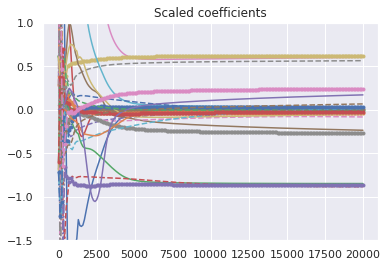

In [204]:
for key in scaled_coeff_keys:
    plt.plot(df_deepmod[key], label=f'{key[-1]}')
    plt.plot(df_lstsq[key], '--', label=f'{key[-1]}')
    #plt.plot(df_logprob[key], '-.' ,label=f'{key[-1]}')
    #plt.plot(df_logprob_lstsq[key], '.-.' ,label=f'{key[-1]}')
    plt.plot(df_logprob_scaled[key], '.-.' ,label=f'{key[-1]}')
#plt.legend()
plt.ylim([-1.5, 1])
plt.title('Scaled coefficients')

(-1.5, 1)

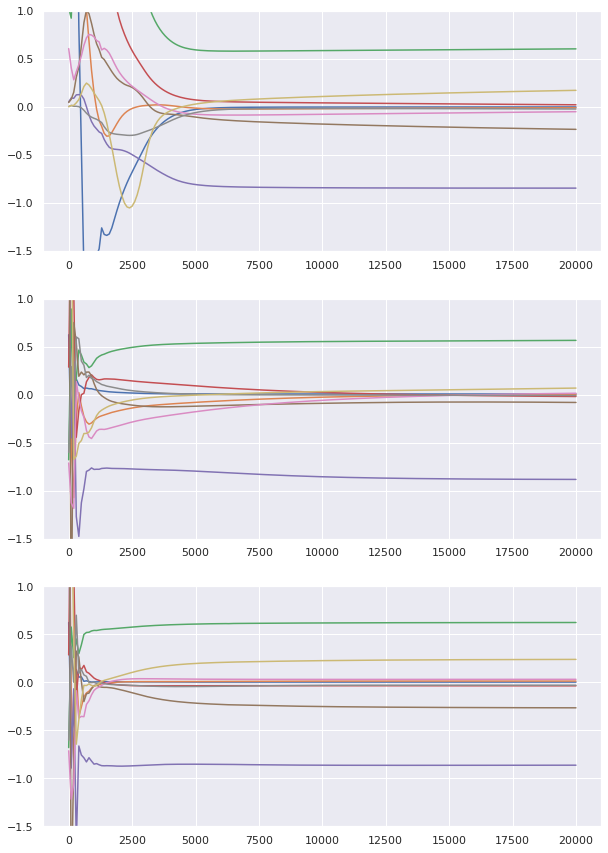

In [199]:
plt.figure(figsize=(10, 15))
plt.subplot(311)
for key in scaled_coeff_keys:
    plt.plot(df_deepmod[key], label=f'{key[-1]}')
plt.ylim([-1.5, 1])

plt.subplot(312)
for key in scaled_coeff_keys:

    plt.plot(df_lstsq[key], label=f'{key[-1]}')
plt.ylim([-1.5, 1])

plt.subplot(313)
for key in scaled_coeff_keys:
    plt.plot(df_logprob_scaled[key] ,label=f'{key[-1]}')
plt.ylim([-1.5, 1])

Text(0.5, 1.0, 'Coefficients at final epoch')

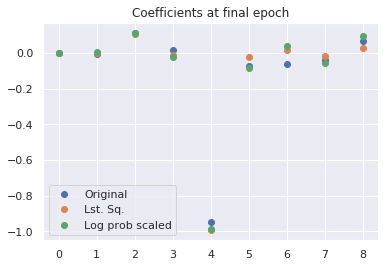

In [183]:
plt.plot(df_deepmod.tail(1)[coeff_keys].T.to_numpy(), 'o', label='Original')
plt.plot(df_lstsq.tail(1)[coeff_keys].T.to_numpy(), 'o', label='Lst. Sq.')
#plt.plot(df_logprob.tail(1)[coeff_keys].T.to_numpy(), 'o', label='Log prob')
#plt.plot(df_logprob_lstsq.tail(1)[coeff_keys].T.to_numpy(), 'o', label='Log prob + lstsq')
plt.plot(df_logprob_scaled.tail(1)[coeff_keys].T.to_numpy(), 'o', label='Log prob scaled')

plt.legend()
plt.title('Coefficients at final epoch')

Text(0.5, 1.0, 'Scaled coefficients at final epoch')

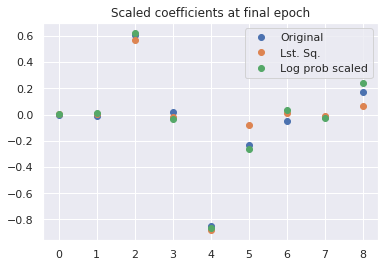

In [185]:
plt.plot(df_deepmod.tail(1)[scaled_coeff_keys].T.to_numpy(), 'o', label='Original')
plt.plot(df_lstsq.tail(1)[scaled_coeff_keys].T.to_numpy(), 'o', label='Lst. Sq.')
#plt.plot(df_logprob.tail(1)[scaled_coeff_keys].T.to_numpy(), 'o', label='Logprob')
#plt.plot(df_logprob_lstsq.tail(1)[scaled_coeff_keys].T.to_numpy(), 'o', label='Log prob + lstsq')
plt.plot(df_logprob_scaled.tail(1)[scaled_coeff_keys].T.to_numpy(), 'o', label='Log prob scaled')

plt.legend()
plt.title('Scaled coefficients at final epoch')

In [186]:
true_coeffs = np.zeros(9)
true_coeffs[2] = 0.1
true_coeffs[4] = -1.0

In [187]:
coeffs_deepmod = df_deepmod.tail(1)[coeff_keys].to_numpy().squeeze()
coeffs_lstsq = df_lstsq.tail(1)[coeff_keys].to_numpy().squeeze()
coeffs_logprob = df_logprob.tail(1)[coeff_keys].to_numpy().squeeze()
coeffs_logprob_lstsq = df_logprob_lstsq.tail(1)[coeff_keys].to_numpy().squeeze()
coeffs_logprob_scaled = df_logprob_scaled.tail(1)[coeff_keys].to_numpy().squeeze()

Text(0.5, 1.0, 'Absolute error in coefficients')

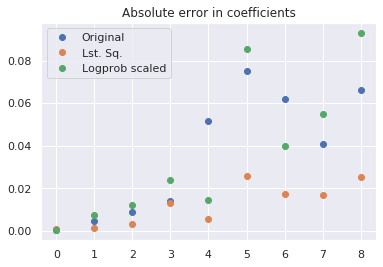

In [188]:
plt.plot(np.abs(true_coeffs - coeffs_deepmod), 'o', label='Original')
plt.plot(np.abs(true_coeffs - coeffs_lstsq), 'o', label='Lst. Sq.')
#plt.plot(np.abs(true_coeffs - coeffs_logprob), 'o', label='Logprob')
#plt.plot(np.abs(true_coeffs - coeffs_logprob_lstsq), 'o', label='Logprob + lstsq')
plt.plot(np.abs(true_coeffs - coeffs_logprob_scaled), 'o', label='Logprob scaled')

plt.legend()
plt.title('Absolute error in coefficients')

In [189]:
mask_in_model = np.zeros(9, dtype=np.bool)
mask_in_model[[2, 4]] = True

mask_out_model = np.ones(9, dtype=np.bool)
mask_out_model[[2, 4]] = False

In [190]:
print('Errors for original model:')
print(f'Mean abs. error for all coeffs, {np.mean(np.abs(true_coeffs - coeffs_deepmod))}')
print(f'Mean abs. error for coeffs in model, {np.mean(np.abs(true_coeffs - coeffs_deepmod)[mask_in_model])}')
print(f'Mean abs. error for coeffs out model, {np.mean(np.abs(true_coeffs - coeffs_deepmod)[mask_out_model])}')

Errors for original model:
Mean abs. error for all coeffs, 0.03592087413708214
Mean abs. error for coeffs in model, 0.030179378390312192
Mean abs. error for coeffs out model, 0.03756130149330212


In [191]:
print('Errors for lstsq model:')
print(f'Mean abs. error for all coeffs, {np.mean(np.abs(true_coeffs - coeffs_lstsq))}')
print(f'Mean abs. error for coeffs in model, {np.mean(np.abs(true_coeffs - coeffs_lstsq)[mask_in_model])}')
print(f'Mean abs. error for coeffs out model, {np.mean(np.abs(true_coeffs - coeffs_lstsq)[mask_out_model])}')

Errors for lstsq model:
Mean abs. error for all coeffs, 0.012134110927581786
Mean abs. error for coeffs in model, 0.004375767707824704
Mean abs. error for coeffs out model, 0.014350780418940954


In [192]:
print('Errors for logprob model:')
print(f'Mean abs. error for all coeffs, {np.mean(np.abs(true_coeffs - coeffs_logprob))}')
print(f'Mean abs. error for coeffs in model, {np.mean(np.abs(true_coeffs - coeffs_logprob)[mask_in_model])}')
print(f'Mean abs. error for coeffs out model, {np.mean(np.abs(true_coeffs - coeffs_logprob)[mask_out_model])}')

Errors for logprob model:
Mean abs. error for all coeffs, 0.16316666872137123
Mean abs. error for coeffs in model, 0.24810232892632483
Mean abs. error for coeffs out model, 0.1388993372342416


In [193]:
print('Errors for logprob + lstsq model:')
print(f'Mean abs. error for all coeffs, {np.mean(np.abs(true_coeffs - coeffs_logprob_lstsq))}')
print(f'Mean abs. error for coeffs in model, {np.mean(np.abs(true_coeffs - coeffs_logprob_lstsq)[mask_in_model])}')
print(f'Mean abs. error for coeffs out model, {np.mean(np.abs(true_coeffs - coeffs_logprob_lstsq)[mask_out_model])}')

Errors for logprob + lstsq model:
Mean abs. error for all coeffs, 0.1950003878937827
Mean abs. error for coeffs in model, 0.1546031802892685
Mean abs. error for coeffs out model, 0.20654244720935822


In [194]:
print('Errors for logprob scaled model:')
print(f'Mean abs. error for all coeffs, {np.mean(np.abs(true_coeffs - coeffs_logprob_scaled))}')
print(f'Mean abs. error for coeffs in model, {np.mean(np.abs(true_coeffs - coeffs_logprob_scaled)[mask_in_model])}')
print(f'Mean abs. error for coeffs out model, {np.mean(np.abs(true_coeffs - coeffs_logprob_scaled)[mask_out_model])}')

Errors for logprob scaled model:
Mean abs. error for all coeffs, 0.03685508767763774
Mean abs. error for coeffs in model, 0.013391029834747312
Mean abs. error for coeffs out model, 0.043559104204177856
